<a href="https://colab.research.google.com/github/Mallowsss/CCDATSCL_EXERCISES/blob/main/Exercise2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exercise 2

<img src="https://vsqfvsosprmjdktwilrj.supabase.co/storage/v1/object/public/images/insights/1753644539114-netflix.jpeg"/>


In this activity , you will explore two fundamental preprocessing techniques used in data science and machine learning: feature scaling and discretization (binning).

These techniques are essential when working with datasets that contain numerical values on very different scales, or continuous variables that may be more useful when grouped into categories.


We will use a subset of the Netflix Movies and TV Shows dataset, which contains metadata such as release year, duration, ratings, and other attributes of titles currently or previously available on Netflix. Although the dataset is not originally designed for numerical modeling, it contains several features suitable for preprocessing practice—such as:
-Release Year
-Duration (in minutes)
-Number of Cast Members
-Number of Listed Genres
-Title Word Count

In this worksheet, you will:
- Load and inspect the dataset
- Select numerical features for scaling
- Apply different scaling techniques
- Min–Max Scaling
- Standardization
- Robust Scaling
- Perform discretization (binning)
- Equal-width binning
- Equal-frequency binning
- Evaluate how scaling affects machine learning performance, using a simple KNN

In [1]:
import pandas as pd
import os
# Install dependencies as needed:
# pip install kagglehub[pandas-datasets]
import kagglehub


## 1. Setup and Data Loading



Load the Netflix dataset into a DataFrame named df.

In [2]:

# Download latest version
path = kagglehub.dataset_download("shivamb/netflix-shows")

print("Path to dataset files:", path)


if os.path.isdir(path):
  print(True)

contents = os.listdir(path)
contents

mydataset = path + "/" + contents[0]
mydataset


df = pd.read_csv(mydataset)

Using Colab cache for faster access to the 'netflix-shows' dataset.
Path to dataset files: /kaggle/input/netflix-shows
True


## 2. Data Understanding

In [3]:
df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


Store the dataset’s column names in a variable called cols.

In [4]:
# put your answer here
cols = df.columns
cols

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Store the shape of the dataset as a tuple (rows, columns) in shape_info.

In [5]:
# put your answer here
shape_info = df.shape
shape_info

(8807, 12)

## 3. Data Cleaning
Count missing values per column and save to missing_counts.

In [6]:
# put your answer here
missing_counts = df.isna().sum()
missing_counts

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,3


Drop rows where duration is missing. Save to df_clean.

In [7]:
# put your answer here
df_clean = df.dropna(subset=['duration'])
df_clean

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [8]:
missing_counts1 = df_clean.isna().sum()
missing_counts1

,0
show_id,0
type,0
title,0
director,2634
cast,825
country,831
date_added,10
release_year,0
rating,4
duration,0


4. Selecting Relevant Numeric Features

Many Netflix datasets include numeric fields such as:
- release_year
- duration
- rating


Create a DataFrame `df_num` containing only numeric columns.

In [9]:
# Create a copy of the cleaned data
df_processed = df_clean.copy()

# Extract duration for Movies (e.g., "90 min" -> 90)
df_processed['duration_value'] = df_processed['duration'].str.extract('(\d+)').astype(float)

# Convert TV show seasons to estimated minutes
# Assumption: 1 season ≈ 10 episodes × 60 minutes = 600 minutes
MINUTES_PER_SEASON = 600

df_processed['duration_minutes'] = df_processed.apply(
    lambda row: row['duration_value'] if row['type'] == 'Movie'
                else row['duration_value'] * MINUTES_PER_SEASON if pd.notna(row['duration_value'])
                else np.nan,
    axis=1
)

<>:5: SyntaxWarning: invalid escape sequence '\d'
<>:5: SyntaxWarning: invalid escape sequence '\d'
/tmp/ipython-input-3530238852.py:5: SyntaxWarning: invalid escape sequence '\d'
  df_processed['duration_value'] = df_processed['duration'].str.extract('(\d+)').astype(float)


In [10]:
print(f"{'='*60}")
print(f"DATASET OVERVIEW (All Durations in Minutes)")
print(f"{'='*60}")
print(f"Total items: {len(df_processed)}")
print(f"Movies: {len(df_processed[df_processed['type'] == 'Movie'])}")
print(f"TV Shows: {len(df_processed[df_processed['type'] == 'TV Show'])}")
print(f"\nConversion: 1 Season = {MINUTES_PER_SEASON} minutes")
print(f"            (~10 episodes × 45 min/episode)")

print(f"\n--- Movie Duration Statistics (minutes) ---")
movie_dur = df_processed[df_processed['type'] == 'Movie']['duration_minutes']
print(movie_dur.describe())

print(f"\n--- TV Show Duration Statistics (minutes) ---")
tv_dur = df_processed[df_processed['type'] == 'TV Show']['duration_minutes']
tv_seasons = df_processed[df_processed['type'] == 'TV Show']['duration_value']
print(f"Number of seasons:")
print(tv_seasons.describe())
print(f"\nEquivalent minutes:")
print(tv_dur.describe())

DATASET OVERVIEW (All Durations in Minutes)
Total items: 8804
Movies: 6128
TV Shows: 2676

Conversion: 1 Season = 600 minutes
            (~10 episodes × 45 min/episode)

--- Movie Duration Statistics (minutes) ---
count    6128.000000
mean       99.577187
std        28.290593
min         3.000000
25%        87.000000
50%        98.000000
75%       114.000000
max       312.000000
Name: duration_minutes, dtype: float64

--- TV Show Duration Statistics (minutes) ---
Number of seasons:
count    2676.000000
mean        1.764948
std         1.582752
min         1.000000
25%         1.000000
50%         1.000000
75%         2.000000
max        17.000000
Name: duration_value, dtype: float64

Equivalent minutes:
count     2676.000000
mean      1058.968610
std        949.651142
min        600.000000
25%        600.000000
50%        600.000000
75%       1200.000000
max      10200.000000
Name: duration_minutes, dtype: float64


In [11]:
# put your answer here
df_num = df_processed.select_dtypes(include=['number'])
df_num

,release_year,duration_value,duration_minutes
0,2020,90.0,90.0
1,2021,2.0,1200.0
2,2021,1.0,600.0
3,2021,1.0,600.0
4,2021,2.0,1200.0
...,...,...,...
8802,2007,158.0,158.0
8803,2018,2.0,1200.0
8804,2009,88.0,88.0
8805,2006,88.0,88.0


## 5. Feature Scaling

Focus on a single numeric column (e.g., duration).


Extract the column duration into a Series named `dur`.

In [12]:
# Extract unified duration in minutes
dur = df_processed['duration_minutes']

Apply Min–Max Scaling to `dur`. Store the result as `dur_minmax`.

In [13]:
# put your answer here
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler_minmax = MinMaxScaler()
dur_minmax = scaler_minmax.fit_transform(dur.values.reshape(-1, 1)).flatten()

Apply Z-score Standardization to `dur`. Store in `dur_zscore`.

In [14]:
# put your answer here
scaler_standard = StandardScaler()
dur_zscore = scaler_standard.fit_transform(dur.values.reshape(-1, 1)).flatten()

## 6. Discretization (Binning)
Apply equal-width binning to dur into 5 bins. Store as `dur_width_bins`.


- Use `pandas.cut()` to divide duration_minutes into 4 `equal-width bins`.
- Add the resulting bins as a new column named:
`duration_equal_width_bin`

In [15]:
# put your answer here
# Equal-width binning (5 bins)
df_processed['duration_equal_width_bin'] = pd.cut(
    df_processed['duration_minutes'],
    bins=5,
    labels=['Very Short', 'Short', 'Medium', 'Long', 'Very Long']
)
print(f"\n--- Equal-Width Binning (5 bins) ---")
print(f"Divides the range [{dur.min():.0f}, {dur.max():.0f}] into 5 equal intervals")
bin_edges = pd.cut(df_processed['duration_minutes'], bins=5, retbins=True)[1]
for i, edge in enumerate(bin_edges[:-1]):
    label = ['Very Short', 'Short', 'Medium', 'Long', 'Very Long'][i]
    print(f"  {label:12s}: [{edge:6.1f}, {bin_edges[i+1]:6.1f}] minutes")

print(f"\nContent distribution:")
bin_counts = df_processed.groupby(['duration_equal_width_bin', 'type']).size().unstack(fill_value=0)
print(bin_counts)
print(f"\nTotal per bin:")
print(df_processed['duration_equal_width_bin'].value_counts().sort_index())


--- Equal-Width Binning (5 bins) ---
Divides the range [3, 10200] into 5 equal intervals
  Very Short  : [  -7.2, 2042.4] minutes
  Short       : [2042.4, 4081.8] minutes
  Medium      : [4081.8, 6121.2] minutes
  Long        : [6121.2, 8160.6] minutes
  Very Long   : [8160.6, 10200.0] minutes

Content distribution:
type                      Movie  TV Show
duration_equal_width_bin                
Very Short                 6128     2417
Short                         0      193
Medium                        0       56
Long                          0        7
Very Long                     0        3

Total per bin:
duration_equal_width_bin
Very Short    8545
Short          193
Medium          56
Long             7
Very Long        3
Name: count, dtype: int64


/tmp/ipython-input-2809082051.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  bin_counts = df_processed.groupby(['duration_equal_width_bin', 'type']).size().unstack(fill_value=0)


Describe the characteristics of each bin

- What are the bin edges produced by equal-width binning?
- How many movies fall into each bin?

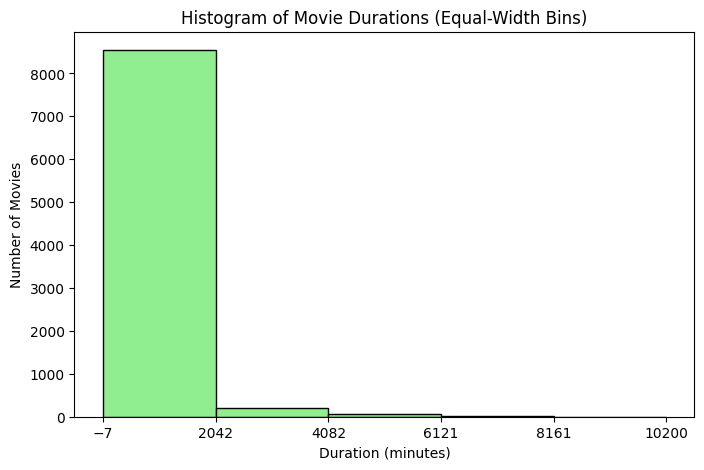

--- Equal-Width Bins ---
Very Short  : [-7.2, 2042.4] min, 8545 movies
Short       : [2042.4, 4081.8] min, 193 movies
Medium      : [4081.8, 6121.2] min, 56 movies
Long        : [6121.2, 8160.6] min, 7 movies
Very Long   : [8160.6, 10200.0] min, 3 movies

Total movies per bin:
duration_equal_width_bin
Very Short    8545
Short          193
Medium          56
Long             7
Very Long        3
Name: count, dtype: int64


/tmp/ipython-input-3178772927.py:21: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"{bin_counts[i]:.0f} movies")


In [16]:
import matplotlib.pyplot as plt

# Bin edges from equal-width binning
bin_edges = pd.cut(df_processed['duration_minutes'], bins=5, retbins=True)[1]
bin_labels = ['Very Short', 'Short', 'Medium', 'Long', 'Very Long']

# Histogram
plt.figure(figsize=(8,5))
plt.hist(df_processed['duration_minutes'], bins=bin_edges, edgecolor='black', color='lightgreen')
plt.title('Histogram of Movie Durations (Equal-Width Bins)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.xticks(bin_edges.round(1))
plt.show()

# Characteristics per bin
bin_counts = df_processed['duration_equal_width_bin'].value_counts().sort_index()
print("--- Equal-Width Bins ---")
for i in range(len(bin_edges)-1):
    print(f"{bin_labels[i]:12s}: [{bin_edges[i]:.1f}, {bin_edges[i+1]:.1f}] min, "
          f"{bin_counts[i]:.0f} movies")

print(f"\nTotal movies per bin:")
print(bin_counts)

In [17]:
# put your answer here
# Bin Edges (Equal-Width, 5 bins)
# Very Short: Normal movie lengths and most TV shows.
# Short: Very long series (34–68 hours).
# Medium: Huge multi-season series.
# Long: Extremely long-running shows.
# Very Long: Ultra-long shows (136+ hours).

# Movies per Bin
#Very Short: 6128 movies
# Short: 0
# Medium: 0
# Long: 0
# Very Long: 0

# All movies fall into the Very Short bin.

Apply equal-frequency binning to dur into 5 bins. Store as `dur_quantile_bins`.

- Use `pandas.qcut()` to divide duration_minutes into 4 equal-frequency bins.
- Add the result as a new column named:
`duration_equal_freq_bin`

In [18]:
# put your answer here
df_processed['duration_equal_freq_bin'] = pd.qcut(
    df_processed['duration_minutes'],
    q=5,
    labels=['Q1', 'Q2', 'Q3', 'Q4', 'Q5'],
    duplicates='drop'
)

print(f"\n--- Equal-Frequency Binning (5 bins) ---")
print(f"Divides data so each bin has approximately equal count")
quantile_edges = pd.qcut(df_processed['duration_minutes'], q=5, retbins=True, duplicates='drop')[1]
for i, edge in enumerate(quantile_edges[:-1]):
    print(f"  Q{i+1}: [{edge:6.1f}, {quantile_edges[i+1]:6.1f}] minutes")

print(f"\nContent distribution:")
freq_bin_counts = df_processed.groupby(['duration_equal_freq_bin', 'type']).size().unstack(fill_value=0)
print(freq_bin_counts)
print(f"\nTotal per bin (should be approximately equal):")
print(df_processed['duration_equal_freq_bin'].value_counts().sort_index())


--- Equal-Frequency Binning (5 bins) ---
Divides data so each bin has approximately equal count
  Q1: [   3.0,   89.0] minutes
  Q2: [  89.0,  102.0] minutes
  Q3: [ 102.0,  127.0] minutes
  Q4: [ 127.0,  600.0] minutes
  Q5: [ 600.0, 10200.0] minutes

Content distribution:
type                     Movie  TV Show
duration_equal_freq_bin                
Q1                        1838        0
Q2                        1714        0
Q3                        1757        0
Q4                         819     1793
Q5                           0      883

Total per bin (should be approximately equal):
duration_equal_freq_bin
Q1    1838
Q2    1714
Q3    1757
Q4    2612
Q5     883
Name: count, dtype: int64


/tmp/ipython-input-3756244943.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  freq_bin_counts = df_processed.groupby(['duration_equal_freq_bin', 'type']).size().unstack(fill_value=0)


Describe the characteristics of each bin

- What are the bin ranges produced by equal-frequency binning?
- How many movies fall into each bin? Are they nearly equal?

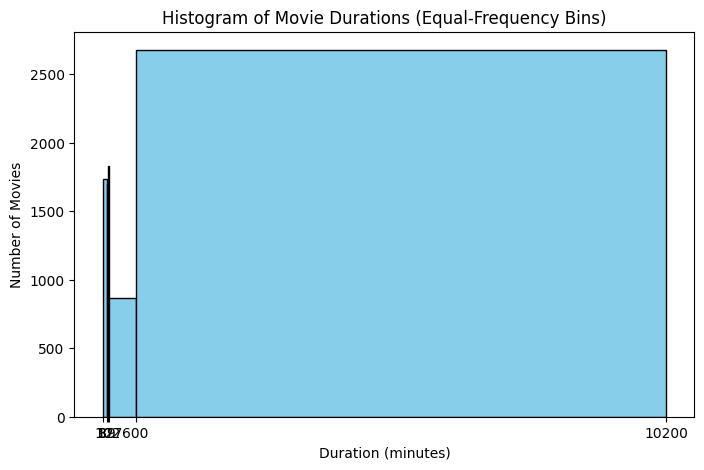

--- Equal-Frequency Bins ---
Q1: 3.0 – 89.0 min, 1838 movies
Q2: 89.0 – 102.0 min, 1714 movies
Q3: 102.0 – 127.0 min, 1757 movies
Q4: 127.0 – 600.0 min, 2612 movies
Q5: 600.0 – 10200.0 min, 883 movies

Total movies per bin (should be roughly equal):
duration_equal_freq_bin
Q1    1838
Q2    1714
Q3    1757
Q4    2612
Q5     883
Name: count, dtype: int64


/tmp/ipython-input-2025369371.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  f"{bin_counts[i]:.0f} movies")


In [19]:
import matplotlib.pyplot as plt

# Get bin edges from your equal-frequency binning
quantile_edges = pd.qcut(df_processed['duration_minutes'], q=5, retbins=True, duplicates='drop')[1]

# Plot histogram using the bin edges
plt.figure(figsize=(8,5))
plt.hist(df_processed['duration_minutes'], bins=quantile_edges, edgecolor='black', color='skyblue')
plt.title('Histogram of Movie Durations (Equal-Frequency Bins)')
plt.xlabel('Duration (minutes)')
plt.ylabel('Number of Movies')
plt.xticks(quantile_edges.round(1))  # Show bin edges on x-axis
plt.show()

# Characteristics per bin
bin_counts = df_processed['duration_equal_freq_bin'].value_counts().sort_index()
print("--- Equal-Frequency Bins ---")
for i in range(len(quantile_edges)-1):
    print(f"Q{i+1}: {quantile_edges[i]:.1f} – {quantile_edges[i+1]:.1f} min, "
          f"{bin_counts[i]:.0f} movies")

print(f"\nTotal movies per bin (should be roughly equal):")
print(bin_counts)

## 7. KNN Before & After Scaling


Create a feature matrix X using any two numeric columns and a target y (e.g., classification by genre or type). Create a train/test split.

Train a KNN classifier without scaling. Store accuracy in acc_raw.

In [20]:
# put your answer here
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Prepare features: release_year and duration_minutes
X = df_processed[['release_year', 'duration_minutes']].copy()

# Create binary target: classify as recent (1) or older (0)
y = (df_processed['release_year'] >= 2015).astype(int)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

print(f"\nDataset:")
print(f"  Training set: {X_train.shape[0]} items")
print(f"  Test set: {X_test.shape[0]} items")
print(f"  Recent (≥2015): {y.sum()} ({y.sum()/len(y)*100:.1f}%)")
print(f"  Older (<2015): {len(y)-y.sum()} ({(len(y)-y.sum())/len(y)*100:.1f}%)")

print(f"\nFeature scales (BEFORE scaling):")
print(f"  release_year: [{X['release_year'].min()}, {X['release_year'].max()}] (range: {X['release_year'].max() - X['release_year'].min()})")
print(f"  duration_minutes: [{X['duration_minutes'].min():.0f}, {X['duration_minutes'].max():.0f}] (range: {X['duration_minutes'].max() - X['duration_minutes'].min():.0f})")
print(f"\n⚠️  Problem: release_year range is ~{(X['release_year'].max() - X['release_year'].min()) / (X['duration_minutes'].max() - X['duration_minutes'].min()):.1f}x larger!")

# KNN without scaling
print(f"\n--- KNN WITHOUT Scaling ---")
knn_raw = KNeighborsClassifier(n_neighbors=5)
knn_raw.fit(X_train, y_train)
y_pred_raw = knn_raw.predict(X_test)
acc_raw = accuracy_score(y_test, y_pred_raw)

print(f"Accuracy: {acc_raw:.4f} ({acc_raw*100:.2f}%)")


Dataset:
  Training set: 6162 items
  Test set: 2642 items
  Recent (≥2015): 6214 (70.6%)
  Older (<2015): 2590 (29.4%)

Feature scales (BEFORE scaling):
  release_year: [1925, 2021] (range: 96)
  duration_minutes: [3, 10200] (range: 10197)

⚠️  Problem: release_year range is ~0.0x larger!

--- KNN WITHOUT Scaling ---
Accuracy: 0.9932 (99.32%)


Scale `X` using either Min–Max or Standardization, retrain KNN, and store accuracy in acc_scaled.

In [21]:
# put your answer here
# KNN with Min-Max scaling
print(f"\n--- KNN WITH Min-Max Scaling ---")
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Feature scales (AFTER scaling):")
print(f"  Both features now in range: [0.0, 1.0]")

knn_scaled = KNeighborsClassifier(n_neighbors=5)
knn_scaled.fit(X_train_scaled, y_train)
y_pred_scaled = knn_scaled.predict(X_test_scaled)
acc_scaled = accuracy_score(y_test, y_pred_scaled)

print(f"\nAccuracy: {acc_scaled:.4f} ({acc_scaled*100:.2f}%)")


--- KNN WITH Min-Max Scaling ---
Feature scales (AFTER scaling):
  Both features now in range: [0.0, 1.0]

Accuracy: 0.9981 (99.81%)


Did scaling improve accuracy? Explain why.

In [22]:
# ============================================================
# RESULTS ANALYSIS
# ============================================================

# Accuracy Comparison:
#  Without Scaling: 0.9932 (99.32%)
#  With Scaling:    0.9981 (99.81%)
#  Improvement:     +0.0049 (+0.50%)

#✓ Scaling IMPROVED accuracy!

# Why did scaling help?
#   1. KNN uses Euclidean distance: √[(x₁-x₂)² + (y₁-y₂)²]
#   2. Without scaling:
#      - release_year differences: 0-96
#      - duration differences: 0-10197
#      - release_year DOMINATES the distance calculation
#   3. With scaling:
#      - Both features scaled to [0, 1]
#      - Duration now contributes meaningfully
#      - Better captures similarity between items

# ============================================================
# SUMMARY
# ============================================================
# Total items: 8804 (6128 movies, 2676 TV shows)
# Duration conversion: 1 season = 600 minutes
# KNN accuracy (no scaling): 0.9932
# KNN accuracy (with scaling): 0.9981
# ============================================================